# Import libraries

In [1]:
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from dataset import NCFDataset
from recom_ncf import NCFRecommender
from evaluation import Evaluation
from helpers.index_manager import IndexManager
from tuner import NCFTuner

# Loading data

In [2]:
df = pd.read_csv('../data/interaction-clean.csv')[['user_id', 'item_id', 'rating_imp']]
df.head()

user_id  item_id  rating_imp
0  76561197960432447       10           1
1  76561198071230926       10           1
2  76561198206216352       10           1
3  76561198110801124       10           1
4  76561199813732773       10           1

# Indexing data

In [3]:
index_manager = IndexManager()
index_manager.fit(df_interaction=df)
index_manager.transform_interactions(df, inplace=True)
df.head()

Indexed 836887 users and 69001 items
User index range: 0-836886
Item index range: 0-69000


user_id  item_id  rating_imp
0        0        0           1
1        1        0           1
2        2        0           1
3        3        0           1
4        4        0           1

# Splitting data

In [4]:
df_train_val, df_test = train_test_split(df, test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train_val, test_size=(0.1/0.9), random_state=42)

# Tuning model

In [5]:
unique_users = index_manager.get_indexed_users()
unique_items = index_manager.get_indexed_items()

tuner = NCFTuner(
    train_data=df_train,
    val_data=df_val,
    test_data=df_test,
    unique_users=unique_users,
    unique_items=unique_items,
)

In [6]:
param_grid = {
            'factors': [8, 16, 32, 64],
            'mlp_user_item_dim': [32, 64, 128],
            'learning_rate': [0.0001, 0.0005, 0.001, 0.0015],
            'epochs': [10, 20, 30],
            'optimizer': ['adam', 'adagrad'],
            'dropout': [0.0, 0.2, 0.5],
            'weight_decay': [0.0, 0.0001, 0.0005, 0.00001],
            'loss_fn': ['bce', 'mse', 'bpr'],
            'batch_size': [4096, 8192, 16384],
}

tuner.set_param_grid(param_grid)

In [7]:
results, file_path = tuner.perform_random_search(num_trials=30)

Running experiment with params: {'factors': 16, 'mlp_user_item_dim': 128, 'learning_rate': 0.0005, 'epochs': 30, 'optimizer': 'adagrad', 'dropout': 0.2, 'weight_decay': 0.0001, 'loss_fn': 'mse', 'batch_size': 16384}
All weights initialized with Gaussian distribution (mean=0, std=0.01)
Epoch 1/30
Train loss: 0.691421, Validation loss: 0.690044
Epoch 2/30
Train loss: 0.687867, Validation loss: 0.684998
Epoch 3/30
Train loss: 0.679335, Validation loss: 0.672929
Epoch 4/30
Train loss: 0.661222, Validation loss: 0.650952
Epoch 5/30
Train loss: 0.630910, Validation loss: 0.617652
Epoch 6/30
Train loss: 0.589429, Validation loss: 0.576605
Epoch 7/30
Train loss: 0.542008, Validation loss: 0.537123
Epoch 8/30
Train loss: 0.495768, Validation loss: 0.500790
Epoch 9/30
Train loss: 0.456627, Validation loss: 0.470272
Epoch 10/30
Train loss: 0.426434, Validation loss: 0.455579
Epoch 11/30
Train loss: 0.404287, Validation loss: 0.441198
Epoch 12/30
Train loss: 0.388133, Validation loss: 0.432337
Epo

In [8]:
best_params = tuner.analyze_results()
print("Best parameters:", best_params)

Best parameters: {'Hit Ratio@10': {'params': {'factors': 16, 'mlp_user_item_dim': 32, 'learning_rate': 0.0005, 'epochs': 30, 'optimizer': 'adagrad', 'dropout': 0.5, 'weight_decay': 1e-05, 'loss_fn': 'mse', 'batch_size': 16384}, 'value': 0.05270573898472904}, 'NDCG@10': {'params': {'factors': 16, 'mlp_user_item_dim': 32, 'learning_rate': 0.0005, 'epochs': 30, 'optimizer': 'adagrad', 'dropout': 0.5, 'weight_decay': 1e-05, 'loss_fn': 'mse', 'batch_size': 16384}, 'value': 0.025087797925848497}, 'Recall@10': {'params': {'factors': 16, 'mlp_user_item_dim': 32, 'learning_rate': 0.0005, 'epochs': 30, 'optimizer': 'adagrad', 'dropout': 0.5, 'weight_decay': 1e-05, 'loss_fn': 'mse', 'batch_size': 16384}, 'value': 0.0518554749482717}}


In [ ]:
'factors': 8, 'mlp_user_item_dim': 256, 'learning_rate': 0.001, 'epochs': 10, 'optimizer': 'adagrad', 'dropout': 0.0, 'weight_decay': 0.0001, 'loss_fn': 'mse'

# Analyzing results

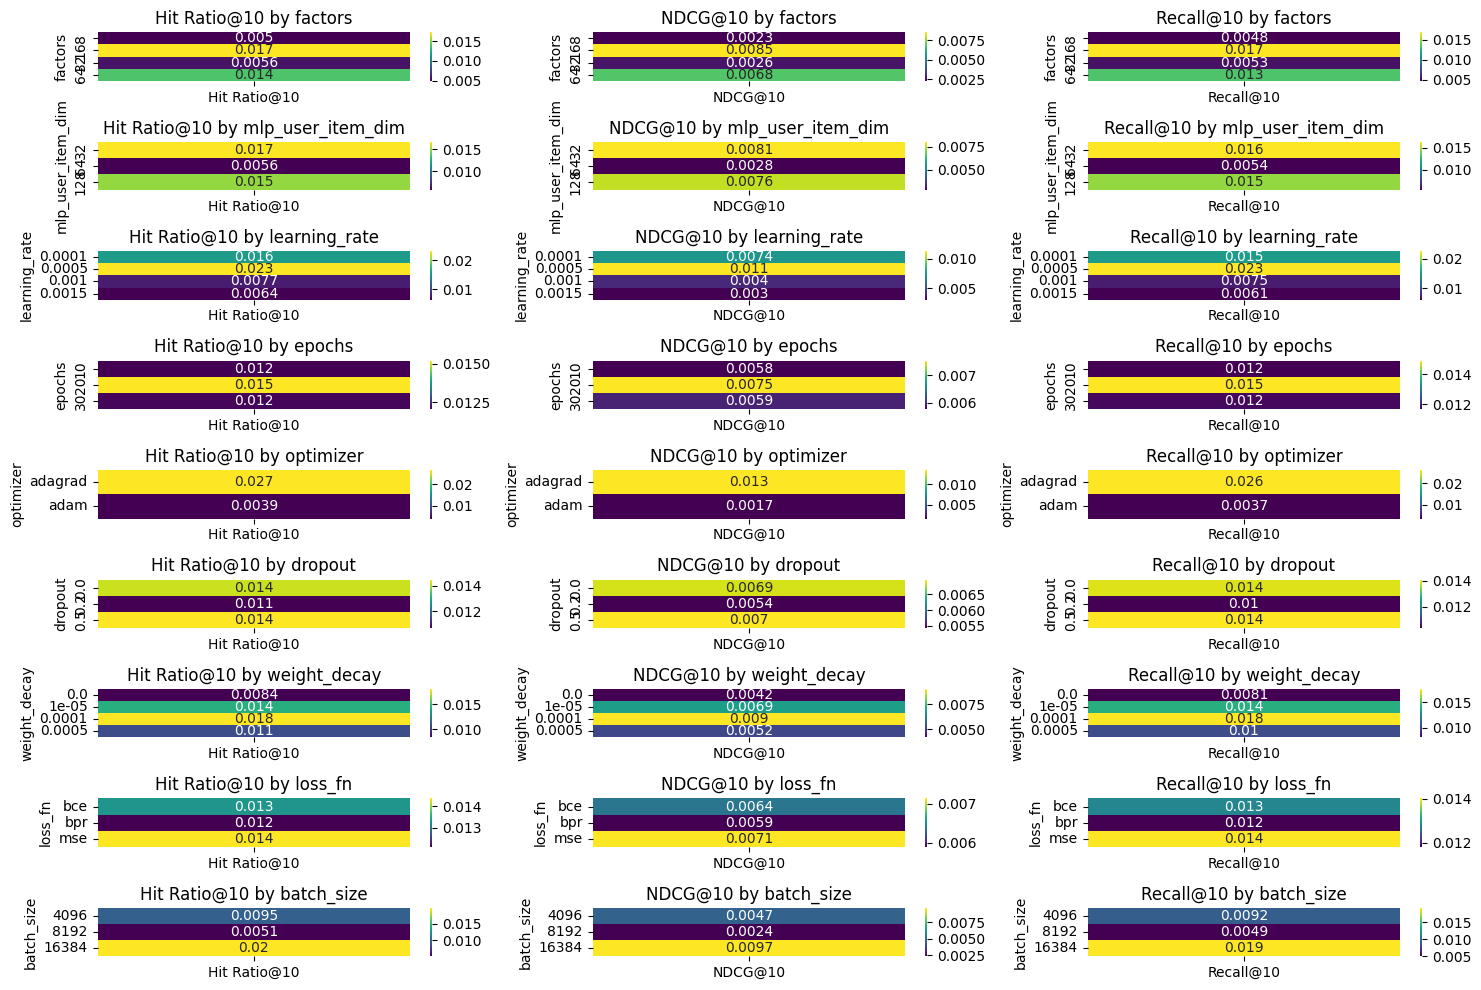

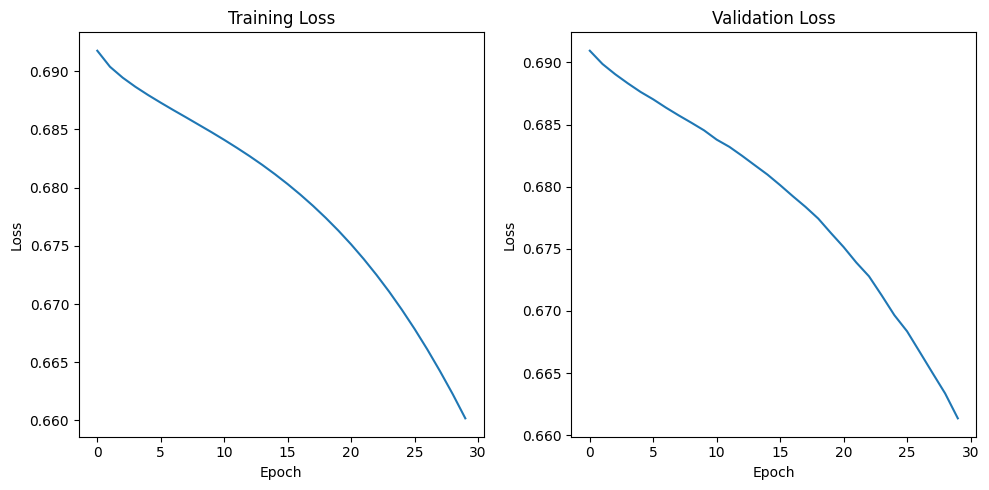

In [9]:
df_result = tuner.plot_results()

In [24]:
df_result

factors  mlp_user_item_dim  learning_rate  epochs optimizer  dropout  \
0        16                128         0.0005      30   adagrad      0.2   
1        16                 32         0.0015      30      adam      0.5   
2        16                 32         0.0010      30   adagrad      0.2   
3        64                 64         0.0010      10      adam      0.2   
4         8                 32         0.0015      20      adam      0.0   
5        16                128         0.0001      20   adagrad      0.0   
6         8                 64         0.0015      10   adagrad      0.5   
7        16                 32         0.0005      30      adam      0.2   
8        64                128         0.0010      30      adam      0.0   
9        64                 32         0.0005      20   adagrad      0.0   
10       32                128         0.0001      20      adam      0.0   
11        8                 64         0.0010      10      adam      0.5   
12       32                 32         0.0005      10      adam      0.2   
13       32                 32         0.0010      30      adam      0.2   
14       64                 32         0.0015      20      adam      0.2   
15       16                128         0.0005      20   adagrad      0.2   
16       64                 64         0.0010      20      adam      0.2   
17       16                 32         0.0005      10   adagrad      0.5   
18       64                 32         0.0005      30      adam      0.5   
19       64                 32         0.0015      20   adagrad      0.2   
20       16                 64         0.0015      30   adagrad      0.2   
21       64                 32         0.0010      30   adagrad      0.5   
22        8                 64         0.0015      10      adam      0.5   
23       16                128         0.0001      30      adam      0.0   
24       32                 32         0.0010      30      adam      0.5   
25       16                 64         0.0015      20      adam      0.5   
26       64                 64         0.0010      30   adagrad      0.5   
27       16                 32         0.0001      10      adam      0.5   
28       16                 64         0.0005      30      adam      0.0   
29       16                 32         0.0005      30   adagrad      0.5   

    weight_decay loss_fn  batch_size  Hit Ratio@10   NDCG@10  Recall@10  
0        0.00010     mse       16384      0.024001  0.013078   0.023326  
1        0.00001     bpr        4096      0.001523  0.000677   0.001453  
2        0.00010     bpr        4096      0.022811  0.011808   0.022145  
3        0.00000     mse        4096      0.001523  0.000700   0.001454  
4        0.00010     bpr       16384      0.001428  0.000646   0.001369  
5        0.00010     bpr       16384      0.041805  0.020498   0.041041  
6        0.00001     mse        8192      0.015347  0.007105   0.014854  
7        0.00000     bpr        4096      0.001552  0.000705   0.001478  
8        0.00000     bpr       16384      0.001219  0.000593   0.001152  
9        0.00010     bpr       16384      0.049221  0.023808   0.048553  
10       0.00000     bpr        4096      0.001971  0.000878   0.001870  
11       0.00010     mse        8192      0.001618  0.000729   0.001543  
12       0.00000     bce        4096      0.016756  0.008111   0.016078  
13       0.00050     bpr        4096      0.001618  0.000727   0.001549  
14       0.00001     bpr       16384      0.001371  0.000680   0.001304  
15       0.00000     bce        4096      0.018413  0.009505   0.017858  
16       0.00001     bpr       16384      0.001628  0.000719   0.001557  
17       0.00001     bpr       16384      0.031199  0.015869   0.030586  
18       0.00050     bpr       16384      0.012805  0.004839   0.012379  
19       0.00000     bpr        4096      0.019555  0.010197   0.018930  
20       0.00001     mse        4096      0.008559  0.003582   0.008225  
21       0.00000   

# Train model with best params

In [11]:
best_param = best_params['Hit Ratio@10']['params']

train_dataset = NCFDataset(df_train)
val_dataset = NCFDataset(df_val)

dataloader_params = {
    'batch_size': best_param.pop('batch_size'),
    'num_workers': 4,
    'persistent_workers': True,
    'prefetch_factor': 2,
    'pin_memory': True,
    'shuffle': True
}

train_dataloader = DataLoader(train_dataset, **dataloader_params)
eval_dataloader = DataLoader(val_dataset, **dataloader_params)

model = NCFRecommender(unique_users, unique_items, **best_param)
model.fit(train_dataloader, eval_dataloader)

evaluator = Evaluation(recommender=model, test_data=df_test)
metrics = evaluator.evaluate()

All weights initialized with Gaussian distribution (mean=0, std=0.01)
Epoch 1/30
Train loss: 0.249310, Validation loss: 0.248898
Epoch 2/30
Train loss: 0.248613, Validation loss: 0.248371
Epoch 3/30
Train loss: 0.248138, Validation loss: 0.247963
Epoch 4/30
Train loss: 0.247740, Validation loss: 0.247592
Epoch 5/30
Train loss: 0.247385, Validation loss: 0.247233
Epoch 6/30
Train loss: 0.247058, Validation loss: 0.246929
Epoch 7/30
Train loss: 0.246750, Validation loss: 0.246617
Epoch 8/30
Train loss: 0.246455, Validation loss: 0.246304
Epoch 9/30
Train loss: 0.246169, Validation loss: 0.246062
Epoch 10/30
Train loss: 0.245891, Validation loss: 0.245765
Epoch 11/30
Train loss: 0.245615, Validation loss: 0.245512
Epoch 12/30
Train loss: 0.245345, Validation loss: 0.245222
Epoch 13/30
Train loss: 0.245070, Validation loss: 0.244963
Epoch 14/30
Train loss: 0.244798, Validation loss: 0.244666
Epoch 15/30
Train loss: 0.244526, Validation loss: 0.244396
Epoch 16/30
Train loss: 0.244242, Valid

In [12]:
for metric in metrics.keys():
    print(f'{metric}:\t{metrics[metric]: .7f}')

Hit Ratio@10:	 0.0685194
NDCG@10:	 0.0302815
Recall@10:	 0.0675888


# Interpretting predictions

In [13]:
df_interaction_count = df.groupby('user_id')[['item_id']].nunique().sort_values('item_id', ascending=False)

In [14]:
df_interaction_count[df_interaction_count['item_id'] == 10]

item_id
user_id         
141666        10
158712        10
50193         10
255627        10
52048         10
...          ...
118056        10
356725        10
17134         10
24418         10
97850         10

[661 rows x 1 columns]

In [15]:
user_id = 141666

In [16]:
df[df['user_id'] == user_id]

user_id  item_id  rating_imp
158130    141666    33017           0
168364    141666    33789           0
324424    141666    45795           1
384844    141666    50159           0
699841    141666     3261           0
963573    141666    12581           0
986333    141666    13777           1
1012781   141666    15355           1
1028380   141666    16342           0
1110849   141666    21866           1

In [17]:
predictions = model.batch_predict_for_users([user_id])

Processing predictions for 1 users and 69001 items
Processing 1 of 1 users... (0.00%)
Memory usage: 0.060791015625 . Increasing batch size with increasing rate of 1.1
Increased user batch size from 1024 to 1126
Increased item batch size from 8096 to 8906
Prediction completed in 0.17 seconds


In [18]:
predictions

{141666: [58947, 2448, 12, 60601, 11503, 30008, 49802, 61563, 27549, 5120]}

## Metadata

In [19]:
df_metadata = pd.read_csv('../data/metadata-clean.csv')
df_metadata.head()

name  item_id  \
0               Clash of Warlords  1430720   
1  Mine Crazy: The Korean Grinder  1430740   
2                            Fade  1430100   
3       Clash: Artifacts of Chaos  1430680   
4                         Astatos  1430970   

                                 supported_languages  \
0      ['Simplified Chinese', 'Traditional Chinese']   
1                                        ['English']   
2                                        ['English']   
3  ['English', 'French', 'Italian', 'German', 'Sp...   
4  ['English', 'Simplified Chinese', 'Traditional...   

                      developers           publishers  \
0              ['XINLINE GAMES']    ['XINLINE GAMES']   
1                  ['Dano Sato']    ['RealMono Inc.']   
2            ['Azimyth Studios']  ['Azimyth Studios']   
3                   ['ACE Team']            ['Nacon']   
4  ['Studio Klondike Australia']  ['Studio Klondike']   

                                          categories  \
0  ['Single-player', 'In-App Purchases', 'Family ...   
1                ['Single-player', 'Family Sharing']   
2                ['Single-player', 'Family Sharing']   
3  ['Single-player', 'Steam Achievements', 'Steam...   
4  ['Single-player', 'Multi-player', 'PvP', 'Onli...   

                                              genres  total_recommendations  \
0                                       ['Strategy']                      0   
1           ['Casual', 'Indie', 'RPG', 'Simulation']                      0   
2                                   ['Indie', 'RPG']                      0   
3                   ['Action', 'Adventure', 'Indie']                    759   
4  ['Adventure', 'Indie', 'Strategy', 'Early Acce...                    243   

  released_date                                               tags   price  
0    2021-02-07  ['Turn-Based Tactics', 'Strategy', 'Wargame', ...   699.0  
1    2020-10-08  ['Casual', 'RPG', 'Simulation', 'Clicker', 'Fa...   199.0  
2    2020-10-29  ['Horror', 'RPG', 'Survival Horror', 'Top-Down...   199.0  
3    2023-03-09  ['Action', 'Adventure', 'RPG', 'Souls-like', '...  2999.0  
4    2021-12-16  ['Early Access', 'Visual Novel', 'Card Battler...  1499.0

## User actual items

In [20]:
user_actual_items = df[(df['user_id'] == user_id) & (df['rating_imp'] == 1)]['item_id'].values
user_actual_items = [index_manager.item_idx_to_id[item] for item in user_actual_items]
user_actual_items

[1796130, 624330, 676730, 886610]

In [21]:
df_metadata[df_metadata['item_id'].isin(user_actual_items)][['name', 'item_id', 'publishers', 'genres', 'tags']]

name  item_id           publishers  \
8874   The Mystery of Happyville   886610        ['Studio HK']   
17043            Behind The Door   676730  ['Dio Alias Games']   
85275     Scare: Project of Fear  1796130               ['HV']   

                                                  genres  \
8874   ['Violent', 'Gore', 'Action', 'Adventure', 'Ca...   
17043                             ['Adventure', 'Indie']   
85275     ['Action', 'Adventure', 'Indie', 'Simulation']   

                                                    tags  
8874   ['Action', 'Adventure', 'Indie', 'Casual', 'Go...  
17043  ['Indie', 'Adventure', 'Puzzle', 'Horror', 'Po...  
85275  ['Survival Horror', 'Psychological Horror', 'S...

## Predicted items

In [22]:
predictions = [index_manager.item_idx_to_id[item] for item in predictions[user_id]]
predictions

[2527500,
 271590,
 730,
 2634950,
 553850,
 1174180,
 1966720,
 2694490,
 1091500,
 359550]

In [23]:
df_metadata[df_metadata['item_id'].isin(predictions)][['name', 'item_id', 'publishers', 'genres', 'tags']]

name  item_id  \
23403                   Lethal Company  1966720   
30599  Tom Clancy's Rainbow Six® Siege   359550   
75736            Red Dead Redemption 2  1174180   
77066               Grand Theft Auto V   271590   
78566                  Path of Exile 2  2694490   
81481                           MiSide  2527500   
81994                    HELLDIVERS™ 2   553850   
82074               Tokyo Xtreme Racer  2634950   
82476                   Cyberpunk 2077  1091500   
83574                 Counter-Strike 2      730   

                             publishers  \
23403                      ['Zeekerss']   
30599                       ['Ubisoft']   
75736                ['Rockstar Games']   
77066                ['Rockstar Games']   
78566           ['Grinding Gear Games']   
81481  ['IndieArk', 'Shochiku (Japan)']   
81994    ['PlayStation Publishing LLC']   
82074                ['Genki Co.,Ltd.']   
82476                ['CD PROJEKT RED']   
83574                         ['Valve']   

                                                  genres  \
23403   ['Action', 'Adventure', 'Indie', 'Early Access']   
30599                                         ['Action']   
75736                            ['Action', 'Adventure']   
77066                            ['Action', 'Adventure']   
78566  ['Action', 'Adventure', 'Massively Multiplayer...   
81481        ['Adventure', 'Indie', 'RPG', 'Simulation']   
81994                                         ['Action']   
82074                         ['Racing', 'Early Access']   
82476                                            ['RPG']   
83574                         ['Action', 'Free To Play']   

                                                    tags  
23403  ['Online Co-Op', 'Horror', 'First-Person', 'Co...  
30599  ['FPS', 'PvP', 'e-sports', 'Multiplayer', 'Tac...  
75736  ['Open World', 'Story Rich', 'Western', 'Adven...  
77066  ['Open World', 'Action', 'Multiplayer', 'Crime...  
78566  ['Action RPG', 'Hack and Slash', 'RPG', 'Loot'...  
81481  ['Psychological Horror', 'Cute', 'Story Rich',...  
81994  ['Online Co-Op', 'PvE', 'Third-Person Shooter'...  
82074  ['Racing', 'Driving', 'Controller', '3D', 'Aut...  
82476  ['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...  
83574  ['FPS', 'Shooter', 'Multiplayer', 'Competitive...